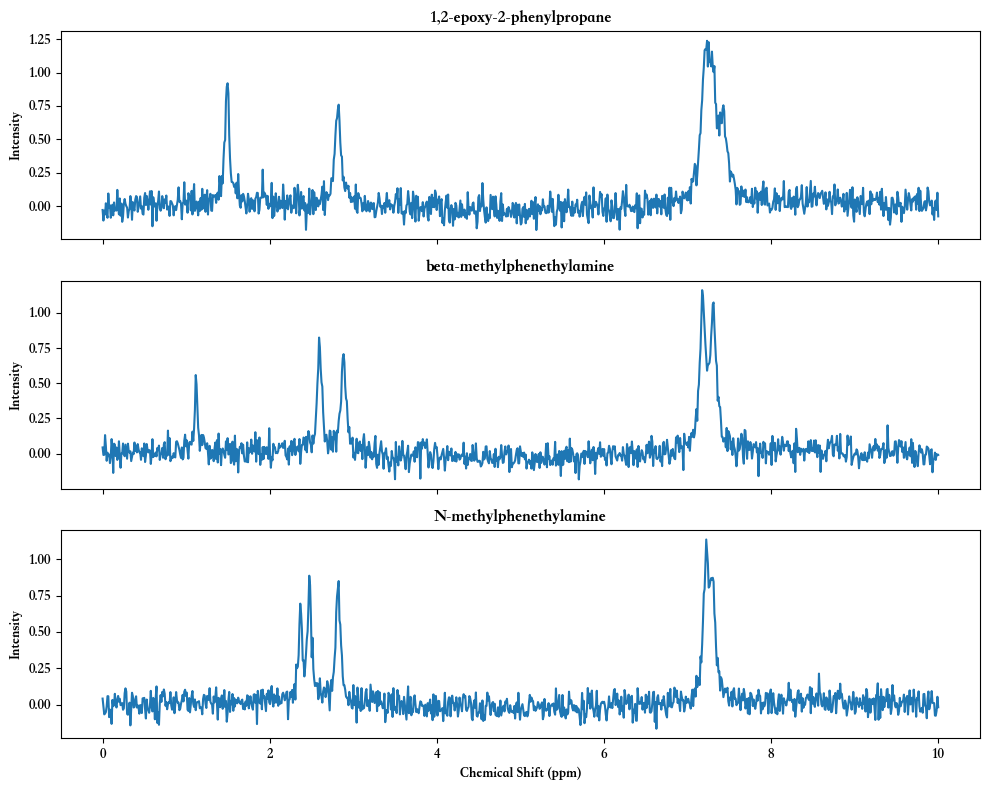

Generated dataset with 30 samples, each with 1024 data points


In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pandas as pd

class NMRSpectrumGenerator:
    """
    Generate synthetic NMR spectra for small molecule compounds.
    """
    def __init__(self, chemical_shift_range=(0, 10), num_points=1024, 
                 noise_level=0.05, baseline_distortion=0.02):
        """
        Initialize the NMR spectrum generator.
        
        Parameters:
        -----------
        chemical_shift_range : tuple
            Range of chemical shifts in ppm (min, max)
        num_points : int
            Number of data points in the spectrum
        noise_level : float
            Level of Gaussian noise to add
        baseline_distortion : float
            Level of baseline distortion to add
        """
        self.chemical_shift_range = chemical_shift_range
        self.num_points = num_points
        self.noise_level = noise_level
        self.baseline_distortion = baseline_distortion
        self.x_axis = np.linspace(chemical_shift_range[0], chemical_shift_range[1], num_points)
    
    def generate_peak(self, center, height, width):
        """
        Generate a Lorentzian peak at the specified position.
        
        Parameters:
        -----------
        center : float
            Center position of the peak in ppm
        height : float
            Height of the peak
        width : float
            Width of the peak
        
        Returns:
        --------
        numpy.ndarray
            Peak intensity values across the spectrum
        """
        return height * (width**2 / ((self.x_axis - center)**2 + width**2))
    
    def add_noise(self, spectrum):
        """
        Add Gaussian noise to the spectrum.
        
        Parameters:
        -----------
        spectrum : numpy.ndarray
            Input spectrum
        
        Returns:
        --------
        numpy.ndarray
            Spectrum with added noise
        """
        noise = np.random.normal(0, self.noise_level * np.max(spectrum), len(spectrum))
        return spectrum + noise
    
    def add_baseline_distortion(self, spectrum):
        """
        Add baseline distortion to the spectrum.
        
        Parameters:
        -----------
        spectrum : numpy.ndarray
            Input spectrum
        
        Returns:
        --------
        numpy.ndarray
            Spectrum with baseline distortion
        """
        baseline = self.baseline_distortion * np.max(spectrum) * np.sin(np.linspace(0, 3*np.pi, len(spectrum)))
        return spectrum + baseline
    
    def generate_compound_spectrum(self, compound_peaks):
        """
        Generate a spectrum for a compound with multiple peaks.
        
        Parameters:
        -----------
        compound_peaks : list of tuples
            List of (position, height, width) tuples for each peak
        
        Returns:
        --------
        numpy.ndarray
            Generated spectrum
        """
        spectrum = np.zeros(self.num_points)
        for center, height, width in compound_peaks:
            spectrum += self.generate_peak(center, height, width)
        
        # Add baseline distortion
        spectrum = self.add_baseline_distortion(spectrum)
        
        # Add noise
        spectrum = self.add_noise(spectrum)
        
        return spectrum

# Define characteristic peaks for the three compounds
# These are simplified approximations for demonstration purposes
# In real applications, these would be determined by reference spectra or computational chemistry

compound_definitions = {
    "1,2-epoxy-2-phenylpropane": [
        # Chemical shift (ppm), height, width
        (7.2, 1.0, 0.05),    # Aromatic protons
        (7.3, 0.8, 0.05),    # Aromatic protons
        (7.4, 0.6, 0.05),    # Aromatic protons
        (2.8, 0.7, 0.04),    # Epoxy CH
        (1.5, 0.9, 0.03),    # Methyl group
    ],
    "beta-methylphenethylamine": [
        (7.2, 1.0, 0.04),    # Aromatic protons
        (7.3, 0.9, 0.04),    # Aromatic protons
        (2.9, 0.8, 0.03),    # CH2 adjacent to NH2
        (2.6, 0.7, 0.03),    # CH adjacent to phenyl
        (1.1, 0.6, 0.02),    # Methyl group
    ],
    "N-methylphenethylamine": [
        (7.2, 1.0, 0.04),    # Aromatic protons
        (7.3, 0.8, 0.04),    # Aromatic protons
        (2.8, 0.9, 0.03),    # CH2 adjacent to N
        (2.5, 0.7, 0.03),    # CH2 adjacent to phenyl
        (2.4, 0.6, 0.02),    # N-Methyl group
    ]
}

def generate_dataset(num_samples_per_compound=10, add_variation=True):
    """
    Generate a dataset of synthetic NMR spectra for the specified compounds.
    
    Parameters:
    -----------
    num_samples_per_compound : int
        Number of samples to generate for each compound
    add_variation : bool
        Whether to add variations to peak positions and intensities
    
    Returns:
    --------
    tuple
        (X, y) where X is the data matrix and y are the labels
    """
    generator = NMRSpectrumGenerator()
    X = []
    y = []
    compound_names = list(compound_definitions.keys())
    
    for i, compound_name in enumerate(compound_names):
        base_peaks = compound_definitions[compound_name]
        
        for _ in range(num_samples_per_compound):
            if add_variation:
                # Add small variations to peak positions and heights
                variation_peaks = []
                for center, height, width in base_peaks:
                    new_center = center + np.random.normal(0, 0.02)  # Small shift in position
                    new_height = height * np.random.uniform(0.9, 1.1)  # Variation in height
                    new_width = width * np.random.uniform(0.9, 1.1)   # Variation in width
                    variation_peaks.append((new_center, new_height, new_width))
                peaks = variation_peaks
            else:
                peaks = base_peaks
            
            spectrum = generator.generate_compound_spectrum(peaks)
            X.append(spectrum)
            y.append(i)  # Use integer labels 0, 1, 2
    
    return np.array(X), np.array(y)

def plot_example_spectra(X, y, compound_names):
    """
    Plot example spectra from the dataset.
    
    Parameters:
    -----------
    X : numpy.ndarray
        Data matrix
    y : numpy.ndarray
        Labels
    compound_names : list
        List of compound names
    """
    plt.rcParams['font.sans-serif'] = ['Songti SC']
    fig, axes = plt.subplots(len(compound_names), 1, figsize=(10, 8), sharex=True)
    x_axis = np.linspace(0, 10, X.shape[1])
    
    for i, compound_name in enumerate(compound_names):
        compound_spectra = X[y == i]
        
        # Plot the first spectrum for each compound
        axes[i].plot(x_axis, compound_spectra[0])
        axes[i].set_title(f"{compound_name}")
        axes[i].set_ylabel("Intensity")
    
    axes[-1].set_xlabel("Chemical Shift (ppm)")
    plt.tight_layout()
    plt.show()

# Example usage
if __name__ == "__main__":
    np.random.seed(42)  # For reproducibility
    
    # Generate dataset with 10 samples per compound
    X, y = generate_dataset(num_samples_per_compound=10)
    compound_names = list(compound_definitions.keys())
    
    # Plot example spectra
    plot_example_spectra(X, y, compound_names)
    
    # Save the dataset
    dataset = {
        'X': X,
        'y': y,
        'compound_names': compound_names
    }
    np.save('synthetic_nmr_dataset.npy', dataset)
    print(f"Generated dataset with {X.shape[0]} samples, each with {X.shape[1]} data points")

Epoch 0, Loss: 0.124024
Epoch 100, Loss: 0.004951
Epoch 200, Loss: 0.004911
Epoch 300, Loss: 0.004871
Epoch 400, Loss: 0.004835
Epoch 500, Loss: 0.004803
Epoch 600, Loss: 0.004775
Epoch 700, Loss: 0.004749
Epoch 800, Loss: 0.004723
Epoch 900, Loss: 0.004699


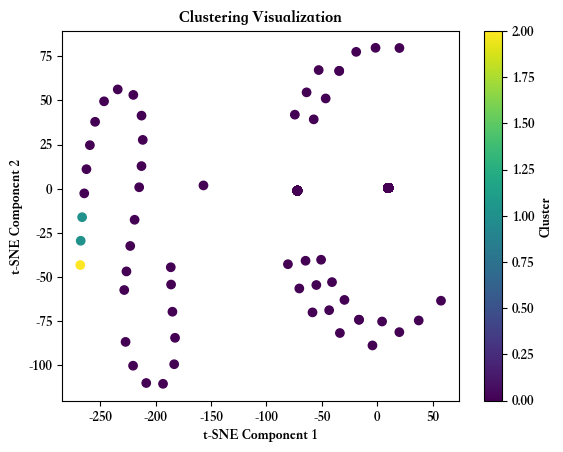

In [72]:
# Import necessary libraries
import numpy as np
import pywt
import torch
import torch.nn as nn
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from dtw import dtw

# Set random seed for reproducibility
np.random.seed(42)
torch.manual_seed(42)

### 1. Load dataset
# Assuming the dataset is a .npy file containing the key 'X' (NMR spectra data)
spectra_dict = np.load('synthetic_nmr_dataset.npy', allow_pickle=True).item()
spectra = spectra_dict['X']  # Extract NMR spectra data, assumed to be a 2D array (n_samples, n_points)

### 2. Data preprocessing

# 2.1 Denoising (Wavelet Transform)
def denoise_signal(signal, wavelet='db4', level=1, threshold_mode='soft'):
    """Denoise the signal using wavelet transform"""
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    threshold = np.std(coeffs[-1]) * np.sqrt(2 * np.log(len(signal)))
    coeffs = [pywt.threshold(c, threshold, mode=threshold_mode) for c in coeffs]
    denoised_signal = pywt.waverec(coeffs, wavelet)
    return denoised_signal[:len(signal)]  # Ensure the length matches the input

# 2.2 Baseline Correction (Polynomial Fitting)
def baseline_correction(signal, degree=3):
    """Perform baseline correction using polynomial fitting"""
    x = np.arange(len(signal))
    baseline_mask = signal < np.percentile(signal, 20)  # Assume the lowest 20% are baseline regions
    baseline_fit = np.polyfit(x[baseline_mask], signal[baseline_mask], degree)
    baseline = np.polyval(baseline_fit, x)
    corrected_signal = signal - baseline
    return corrected_signal

# 2.3 Normalization
def normalize_signal(signal):
    """Normalize the signal to its maximum intensity"""
    max_intensity = np.max(np.abs(signal))
    return signal / max_intensity if max_intensity > 0 else signal

# 2.4 Frequency Alignment (Dynamic Time Warping, DTW)
def align_spectra(spectra, reference_idx=0):
    reference = spectra[reference_idx]
    aligned_spectra = []
    max_length = 0
    
    # Step 1: Compute aligned spectra and find the maximum length
    for spectrum in spectra:
        alignment = dtw(spectrum, reference, keep_internals=True)
        aligned_spectrum = spectrum[alignment.index1]
        aligned_spectra.append(aligned_spectrum)
        if len(aligned_spectrum) > max_length:
            max_length = len(aligned_spectrum)
    
    # Step 2: Pad to the maximum length
    padded_spectra = []
    for spec in aligned_spectra:
        padded_spec = np.pad(spec, (0, max_length - len(spec)), mode='constant', constant_values=0)
        padded_spectra.append(padded_spec)
    
    # Step 3: Convert to NumPy array
    return np.array(padded_spectra)

# Apply preprocessing
preprocessed_spectra = []
for spectrum in spectra:
    denoised = denoise_signal(spectrum)
    corrected = baseline_correction(denoised)
    normalized = normalize_signal(corrected)
    preprocessed_spectra.append(normalized)
aligned_spectra = align_spectra(np.array(preprocessed_spectra))

### 3. Feature extraction

# 3.1 Sliding Window Feature Extraction
def extract_window_features(signal, window_size=100, step=50):
    """Extract statistical features from sliding windows of the signal"""
    features = []
    for start in range(0, len(signal) - window_size + 1, step):
        window = signal[start:start + window_size]
        mean = np.mean(window)
        var = np.var(window)
        slope = np.polyfit(np.arange(window_size), window, 1)[0]  # Slope
        features.append([mean, var, slope])
    return np.array(features)

# 3.2 PCA Dimensionality Reduction
def apply_pca(features, variance_ratio=0.95):
    """Apply PCA to reduce the dimensionality of the feature matrix"""
    pca = PCA(n_components=variance_ratio, svd_solver='auto')
    reduced_features = pca.fit_transform(features)
    return reduced_features

# Extract features and reduce dimensionality
features = [extract_window_features(s) for s in aligned_spectra]
feature_matrix = np.vstack(features)  # Combine features from all samples
reduced_features = apply_pca(feature_matrix)

### 4. Autoencoder Training (Attention-Based BiLSTM)

# 4.1 Define the ABBL Model
class ABBL(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(ABBL, self).__init__()
        self.encoder = nn.LSTM(input_size, hidden_size, bidirectional=True, batch_first=True)
        self.attention = nn.Linear(hidden_size * 2, 1)  # Bidirectional LSTM doubles the output dimension
        self.decoder = nn.LSTM(hidden_size * 2, input_size, batch_first=True)
        self.sparsity = nn.L1Loss()  # Sparsity regularization

    def forward(self, x):
        enc_output, (h_n, c_n) = self.encoder(x)  # Encoder output
        attn_weights = torch.softmax(self.attention(enc_output), dim=1)  # Attention weights
        context = torch.sum(attn_weights * enc_output, dim=1)  # Context vector
        dec_input = context.unsqueeze(1).repeat(1, x.size(1), 1)  # Expand to sequence
        dec_output, _ = self.decoder(dec_input)  # Decoder output
        sparsity_loss = self.sparsity(h_n.abs(), torch.zeros_like(h_n))  # Sparsity loss
        return dec_output, sparsity_loss

# 4.2 Training Function
def train_abbl(model, data, epochs=1000, lr=0.001):
    """Train the ABBL model"""
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()
    for epoch in range(epochs):
        optimizer.zero_grad()
        output, sparsity_loss = model(data)
        recon_loss = criterion(output, data)  # Reconstruction loss
        loss = recon_loss + 0.01 * sparsity_loss  # Total loss (including sparsity regularization)
        loss.backward()
        optimizer.step()
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item():.6f}")
    return model

# Prepare data and train the model
data_tensor = torch.tensor(reduced_features, dtype=torch.float32).unsqueeze(0)  # (1, seq_len, feature_dim)
model = ABBL(input_size=reduced_features.shape[1], hidden_size=64)
trained_model = train_abbl(model, data_tensor)

### 5. Generate Representations and Clustering

# Obtain low-dimensional representations
with torch.no_grad():
    representations, _ = trained_model(data_tensor)
    representations = representations.squeeze(0).numpy()  # Convert to NumPy array

# Apply K-means clustering
def apply_kmeans(representations, n_clusters=3):
    """Perform K-means clustering on the representations"""
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(representations)
    return labels

labels = apply_kmeans(representations)

### 6. Visualization

def visualize_clusters(representations, labels):
    """Use t-SNE to reduce to 2D and visualize clustering results"""
    tsne = TSNE(n_components=2, random_state=42)
    reduced = tsne.fit_transform(representations)
    plt.rcParams['font.sans-serif'] = ['Songti SC']
    plt.scatter(reduced[:, 0], reduced[:, 1], c=labels, cmap='viridis')
    plt.title("Clustering Visualization")
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.colorbar(label="Cluster")
    plt.show()

# Visualize clustering results
visualize_clusters(representations, labels)
